# Data Science and Engineering Methods

Name : Sampada Santoshkumar Kasture

NUID : 002743809

# **Assignment 1**

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



There is an example notebook for assignment one here

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks to an external site.

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1uboLinks to an external site.

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonLinks to an external site.

AutoML_Assingment_Analysis_Pipeline-1.png

Scoring Rubric

Are my answers supported with data? (20 Points)

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)



Public dataset (5 Points)

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.



What code is yours and what have you adapted? (5 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.



Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.



Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.



Answers to listed questions (45 Points)



* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# **Abstract**

The objective is to evaluate a dataset on Wine quality prediction using diagnostic measures. The data includes details on a number of measurements, including fixed acidity, volatile acidity, total and free sulfur, alcohol etc. The following topics are addressed using statistical techniques like p-value and t-statistics as well as visualization methods like histograms, Q-Q plots, and box plots using Python's matplotlib and seaborn libraries:

• Which independent variables are useful in predicting the target (Wine)?

• Which independent variables have missing data and how much?

• Are the training and test sets similar?

• Are the predictor variables independent of each other?

• What are the most important predictor variables?

• Do the ranges of the predictor variables make sense?

• What are the distributions of the predictor variables?

The results demonstrate that the data is accurate and free of any missing or conflicting values. All independent variables were examined for significance in the predictors, and it was discovered that they are all significant. With the use of these results, the wine quality prediction model can be enhanced to make predictions that are more precise

# **Dataset**
* What are the data types? (Only numeric and categorical)

The data set consists of :

1. 12 diagnostic measures to predict diabetes i.e. 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality' - The independent variables

2. Wine type - The dependent variable

3. The category of Wine type ranges from 0(No) to 1(Yes)
There are a total of 6497 observations


In [ ]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


In [ ]:
# installing dependencies
!pip install eli5

In [ ]:
#reading the dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sampada-kasture/Data-Science/main/winequalityN.csv')

In [ ]:
# display the first five rows of the dataset
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

# **What are the data types?**

In [ ]:
#datatypes are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB




*   Are there any missing values?





In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

There are missing values in the following features: fixed acidity, volaitle acidiyt, citric acid , residual sugar, chlorides, pH and sulphates

In [ ]:
df['quality'].nunique()

7

In [ ]:
#converting the wine feature into 0 and 1
df['is_type'] = df['type'].map({'white':1,'red':0})
df['is_type']
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  is_type  
0       0.45      8.8        6        1  
1       0.49      9.5        6        1  
2       0.44     10.1        6        1  
3       0.40      9.9        6        1  
4       0.40      9.9        6        1

In [ ]:
#imputing null values with mean/median
df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)


In [ ]:
#imputing null values with mean/median
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)

In [ ]:
#imputing null values with mean/median
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

In [ ]:
#imputing null values with mean/median
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

In [ ]:
#imputing null values with mean/median
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)

In [ ]:
#imputing null values with mean/median
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

In [ ]:
#checking missing data after imputing null values wiht mean/median
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_type                 0
dtype: int64

In [ ]:
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)

<Figure size 800x500 with 0 Axes>

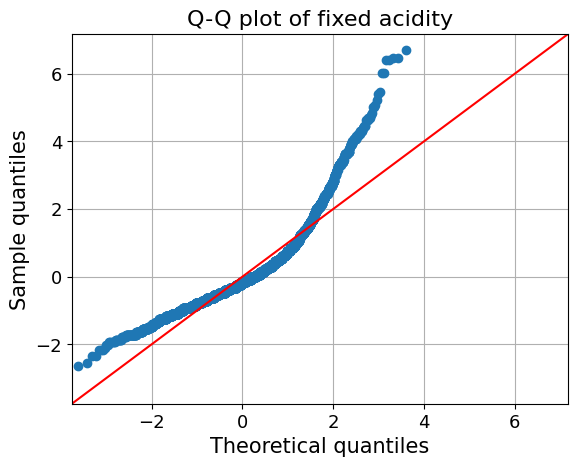

<Figure size 800x500 with 0 Axes>

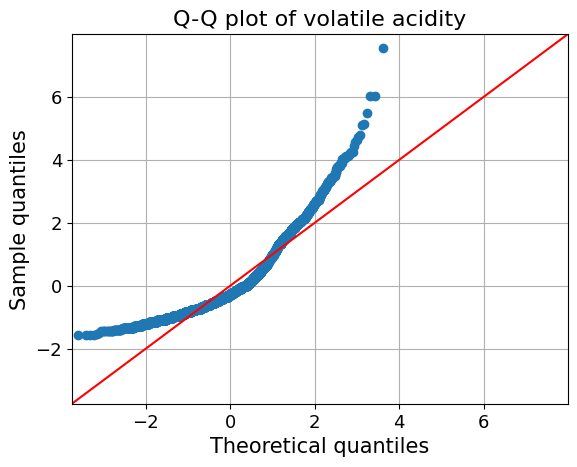

<Figure size 800x500 with 0 Axes>

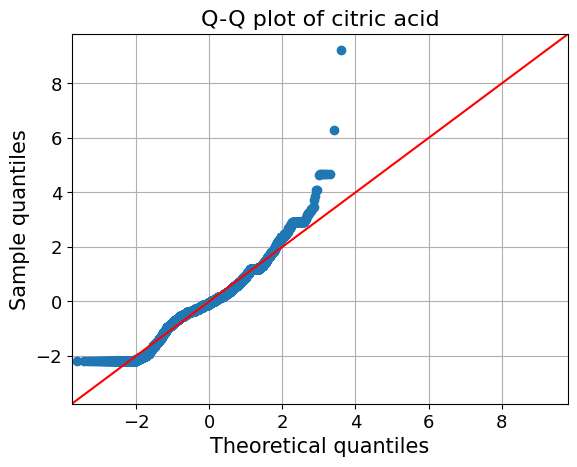

<Figure size 800x500 with 0 Axes>

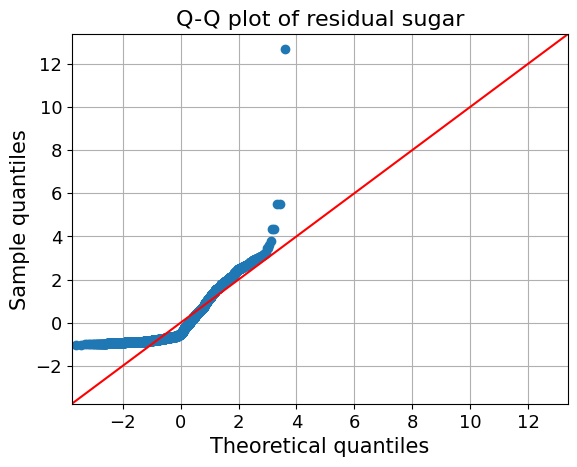

<Figure size 800x500 with 0 Axes>

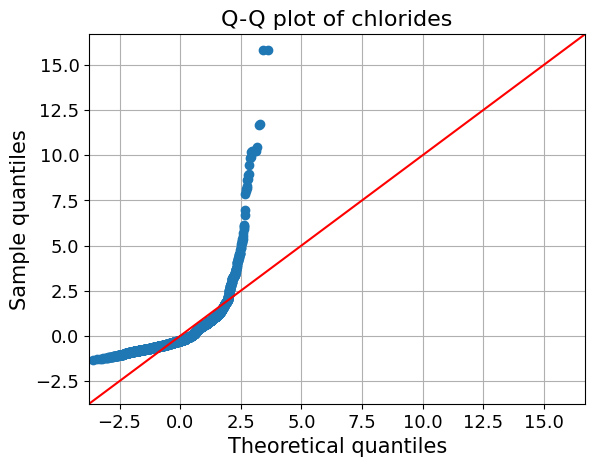

<Figure size 800x500 with 0 Axes>

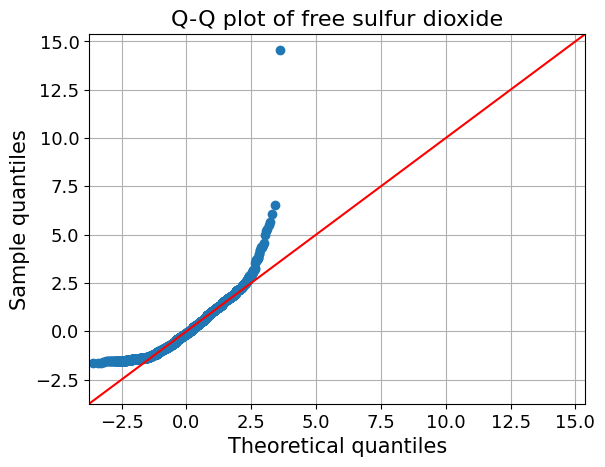

<Figure size 800x500 with 0 Axes>

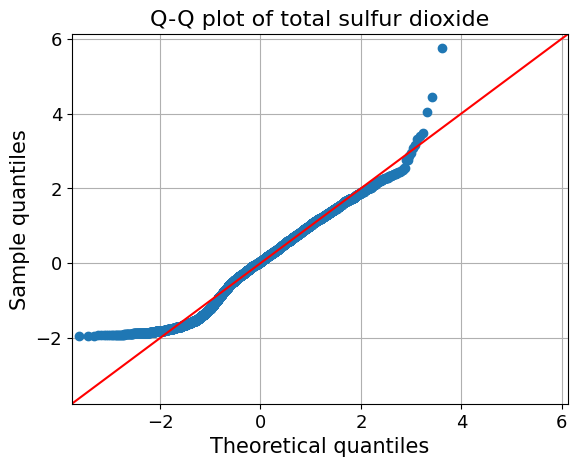

<Figure size 800x500 with 0 Axes>

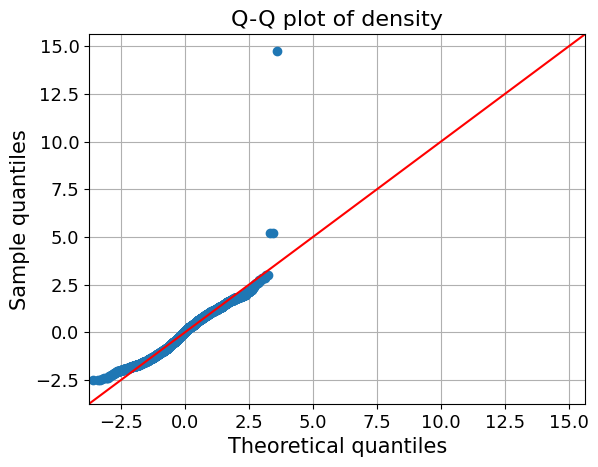

<Figure size 800x500 with 0 Axes>

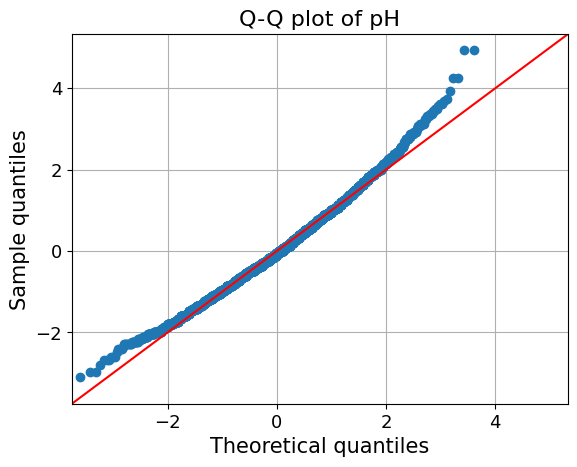

<Figure size 800x500 with 0 Axes>

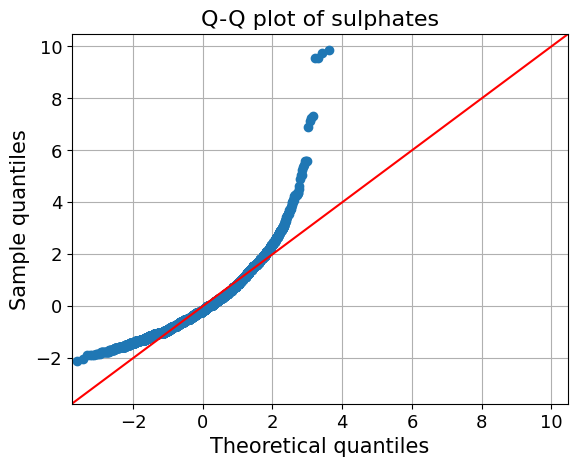

<Figure size 800x500 with 0 Axes>

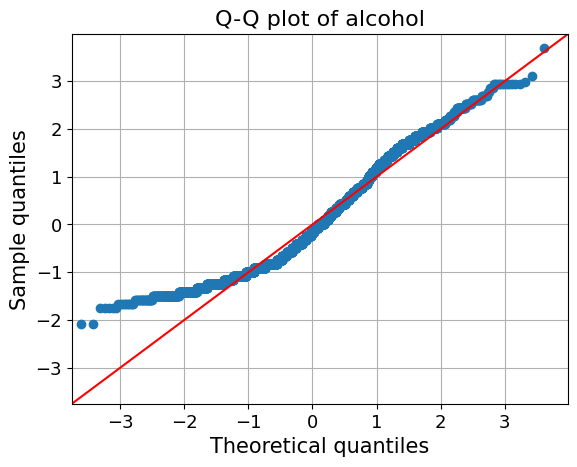

<Figure size 800x500 with 0 Axes>

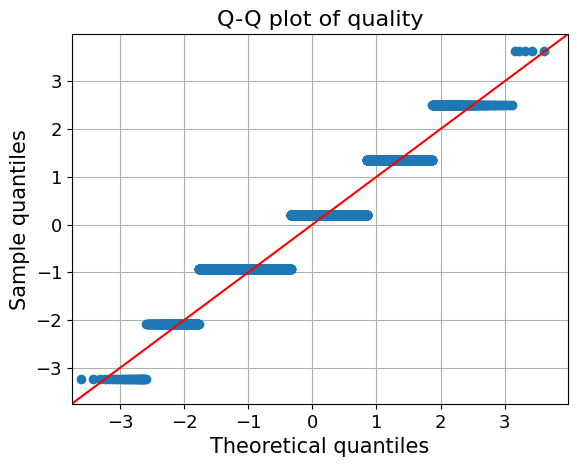

In [ ]:
#Plotting qq-plot for all the features
from statsmodels.graphics.gofplots import qqplot
data = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
for c in data.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


*   Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution except chlorides
*   There are few outliers in few of the predictor variables like in residual sugar, free sulfur dioxide, total sulfur dioxide



<Axes: >

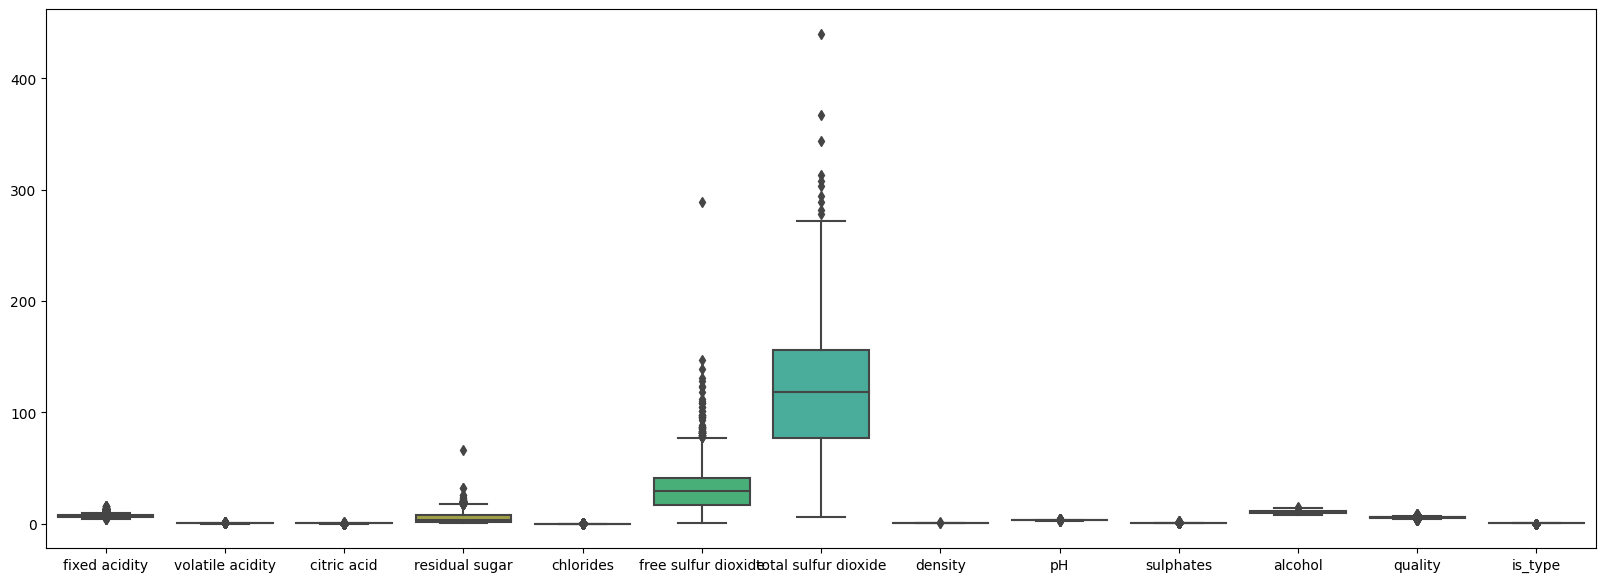

In [ ]:
# Checking the Ranges of the predictor variables and dependent variable
#boxplot to identify the outliers
plt.figure(figsize=(20, 7))
sns.boxplot(data=df)

It is observed that total sulfur dioxide has most outliers while residual sugar, free sulfur dioxide has few outliers.

# **Data Transforming feature creation and analysis**

In [ ]:
# Creating binary vaiables for chlorides

data = pd.get_dummies(data)

# Normalizing the data in the chlorides column beacuse its not aligned according to the qq- plot

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["chlorides"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[["chlorides"]] = pd.DataFrame(x_scaled)

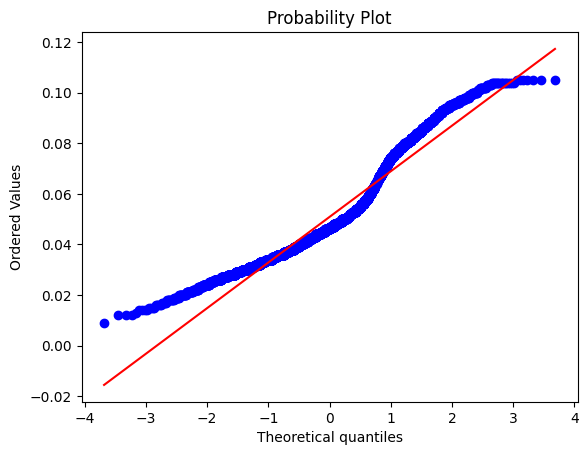

In [ ]:
# Plot the Q-Q plot
stats.probplot(df['chlorides'], dist="norm", plot=plt)
plt.show()

In [ ]:
#Description of the dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6036.000000       6036.000000  6036.000000     6036.000000   
mean        7.191752          0.335216     0.314343        5.253651   
std         1.280704          0.161172     0.139365        4.400507   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        2.900000   
75%         7.600000          0.400000     0.390000        7.900000   
max        15.900000          1.330000     1.660000       17.750000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6036.000000          6036.000000           6036.000000  6036.000000   
mean      0.050889            29.937790            115.250497     0.994517   
std       0.018661            16.155396             54.904162     0.002884   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.037000            17.000000             79.000000     0.992160   
50%       0.046000            29.000000            118.000000     0.994700   
75%       0.060000            41.000000            154.000000     0.996800   
max       0.105000            77.000000            259.000000     1.003200   

                pH    sulphates      alcohol      quality      is_type  
count  6036.000000  6036.000000  6036.000000  6036.000000  6036.000000  
mean      3.222531     0.525723    10.543469     5.843605     0.765076  
std       0.160966     0.136280     1.191491     0.873277     0.423986  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.500000    10.400000     6.000000     1.000000  
75%       3.330000     0.600000    11.400000     6.000000     1.000000  
max       4.010000     1.620000    14.900000     9.000000     1.000000

In [ ]:
#To find the correlation between the variables
df.corr()

<ipython-input-158-0a7b5fbcda65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.204823     0.321762   
volatile acidity           0.204823          1.000000    -0.411355   
citric acid                0.321762         -0.411355     1.000000   
residual sugar            -0.109164         -0.203652     0.160196   
chlorides                  0.444475          0.523244    -0.139495   
free sulfur dioxide       -0.283590         -0.359949     0.160113   
total sulfur dioxide      -0.321148         -0.414670     0.218061   
density                    0.472387          0.268190     0.086886   
pH                        -0.257766          0.271679    -0.320591   
sulphates                  0.280852          0.198071     0.033776   
alcohol                   -0.111255         -0.032035    -0.004364   
quality                   -0.075943         -0.258239     0.095593   
is_type                   -0.469064         -0.646045     0.215592   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.109164   0.444475            -0.283590   
volatile acidity           -0.203652   0.523244            -0.359949   
citric acid                 0.160196  -0.139495             0.160113   
residual sugar              1.000000  -0.151973             0.446733   
chlorides                  -0.151973   1.000000            -0.313396   
free sulfur dioxide         0.446733  -0.313396             1.000000   
total sulfur dioxide        0.506013  -0.409312             0.723059   
density                     0.516708   0.578961             0.031056   
pH                         -0.274287   0.221097            -0.151179   
sulphates                  -0.181999   0.377065            -0.186556   
alcohol                    -0.366436  -0.330958            -0.176235   
quality                    -0.023778  -0.254315             0.084614   
is_type                     0.349706  -0.766968             0.482883   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.321148  0.472387 -0.257766   0.280852   
volatile acidity                 -0.414670  0.268190  0.271679   0.198071   
citric acid                       0.218061  0.086886 -0.320591   0.033776   
residual sugar                    0.506013  0.516708 -0.274287  -0.181999   
chlorides                        -0.409312  0.578961  0.221097   0.377065   
free sulfur dioxide               0.723059  0.031056 -0.151179  -0.186556   
total sulfur dioxide              1.000000  0.026335 -0.233602  -0.274323   
density                           0.026335  1.000000  0.036030   0.270109   
pH                               -0.233602  0.036030  1.000000   0.246153   
sulphates                        -0.274323  0.270109  0.246153   1.000000   
alcohol                          -0.264407 -0.714134  0.100729   0.008667   
quality                          -0.031973 -0.307305  0.012956   0.061974   
is_type                           0.701799 -0.412607 -0.343498  -0.473708   

                       alcohol   quality   is_type  
fixed acidity        -0.111255 -0.075943 -0.469064  
volatile acidity     -0.032035 -0.258239 -0.646045  
citric acid          -0.004364  0.095593  0.215592  
residual sugar       -0.366436 -0.023778  0.349706  
chlorides            -0.330958 -0.254315 -0.766968  
free sulfur dioxide  -0.176235  0.084614  0.482883  
total sulfur dioxide -0.264407 -0.031973  0.701799  
density              -0.714134 -0.307305 -0.412607  
pH                    0.100729  0.012956 -0.343498  
sulphates             0.008667  0.061974 -0.473708  
alcohol               1.000000  0.440710  0.040505  
quality               0.440710  1.000000  0.117356  
is_type               0.040505  0.117356  1.000000

In [ ]:
# data after normalizing and feature creation
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7   0.059801   
1            6.3              0.30         0.34             1.6   0.066445   
2            8.1              0.28         0.40             6.9   0.068106   
3            7.2              0.23         0.32             8.5   0.081395   
4            7.2              0.23         0.32             8.5   0.081395   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<Axes: >

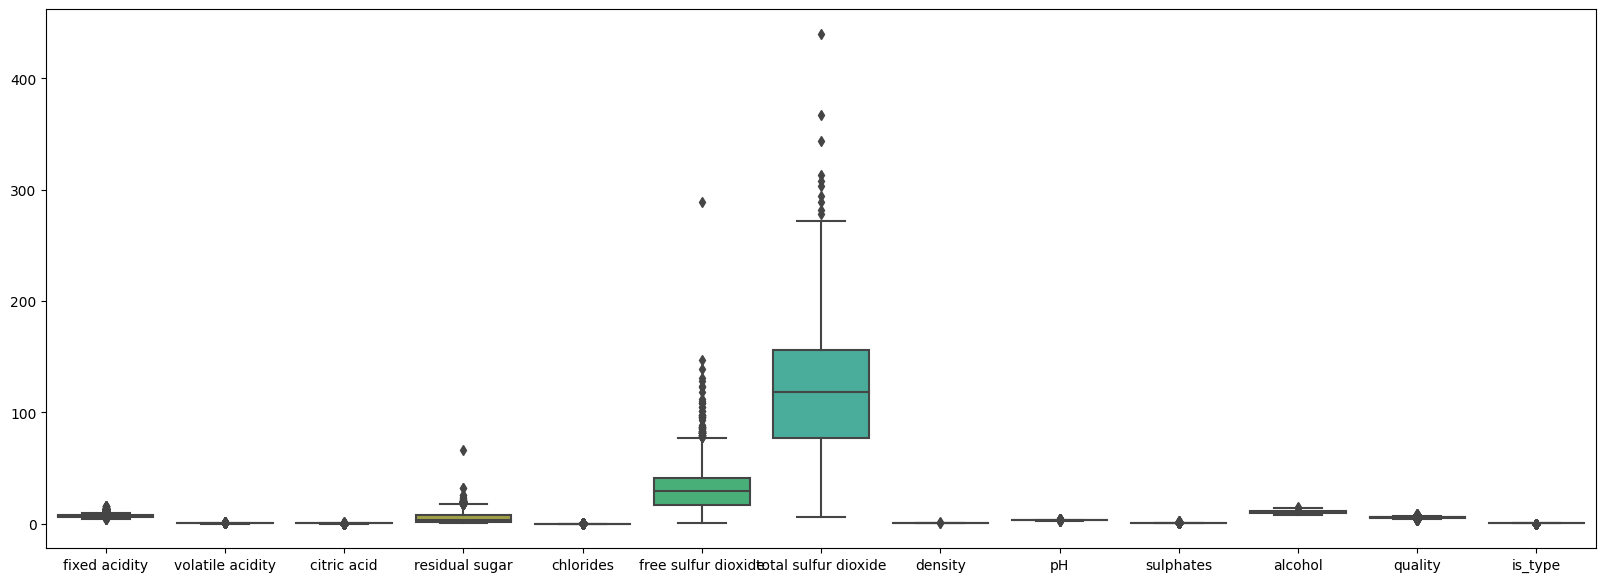

In [ ]:
# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 7))
sns.boxplot(data=df)

<ipython-input-97-48b25d85b87b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


<Axes: >

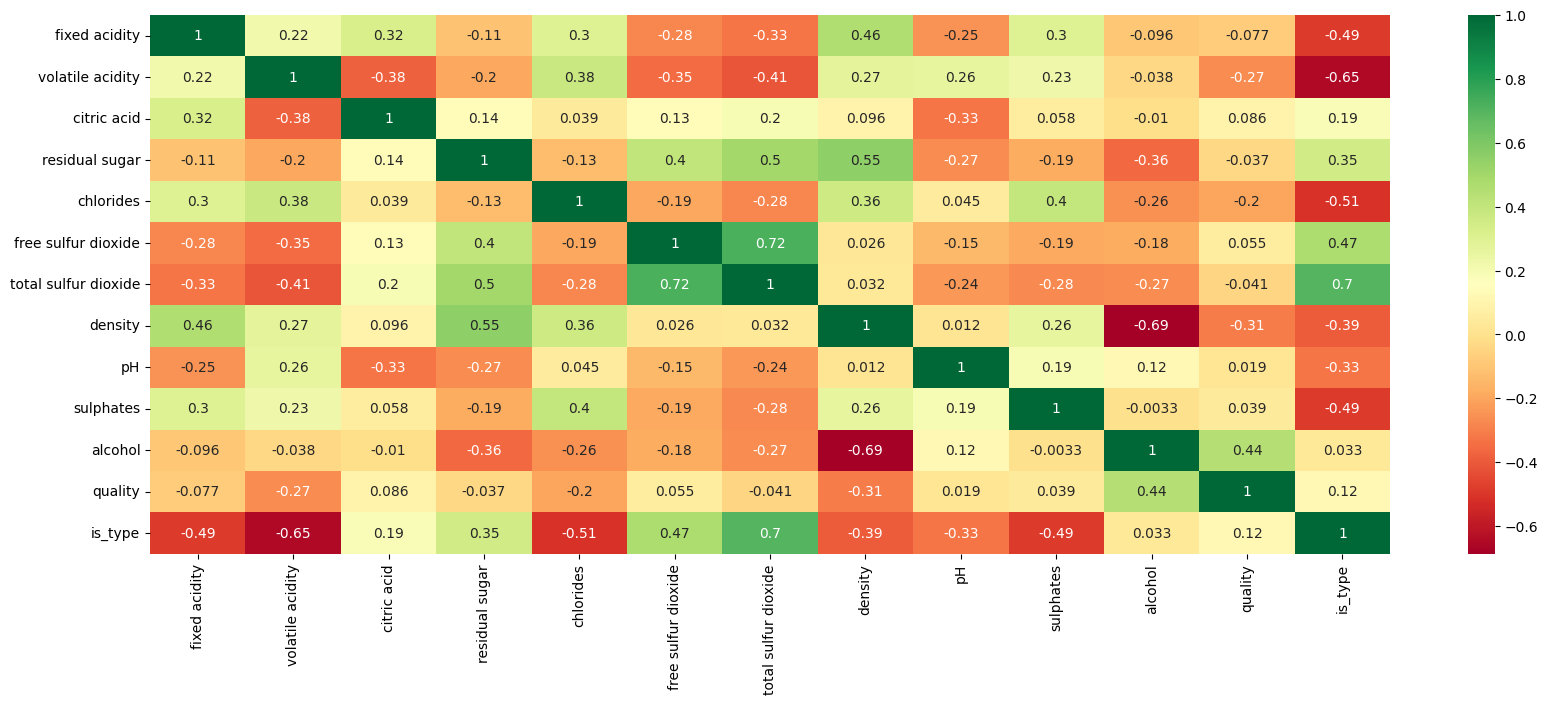

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

Total sulfur dioxide,free sulfur dioxide and is_type are about 0.7 which determines multi-collinearity between the them

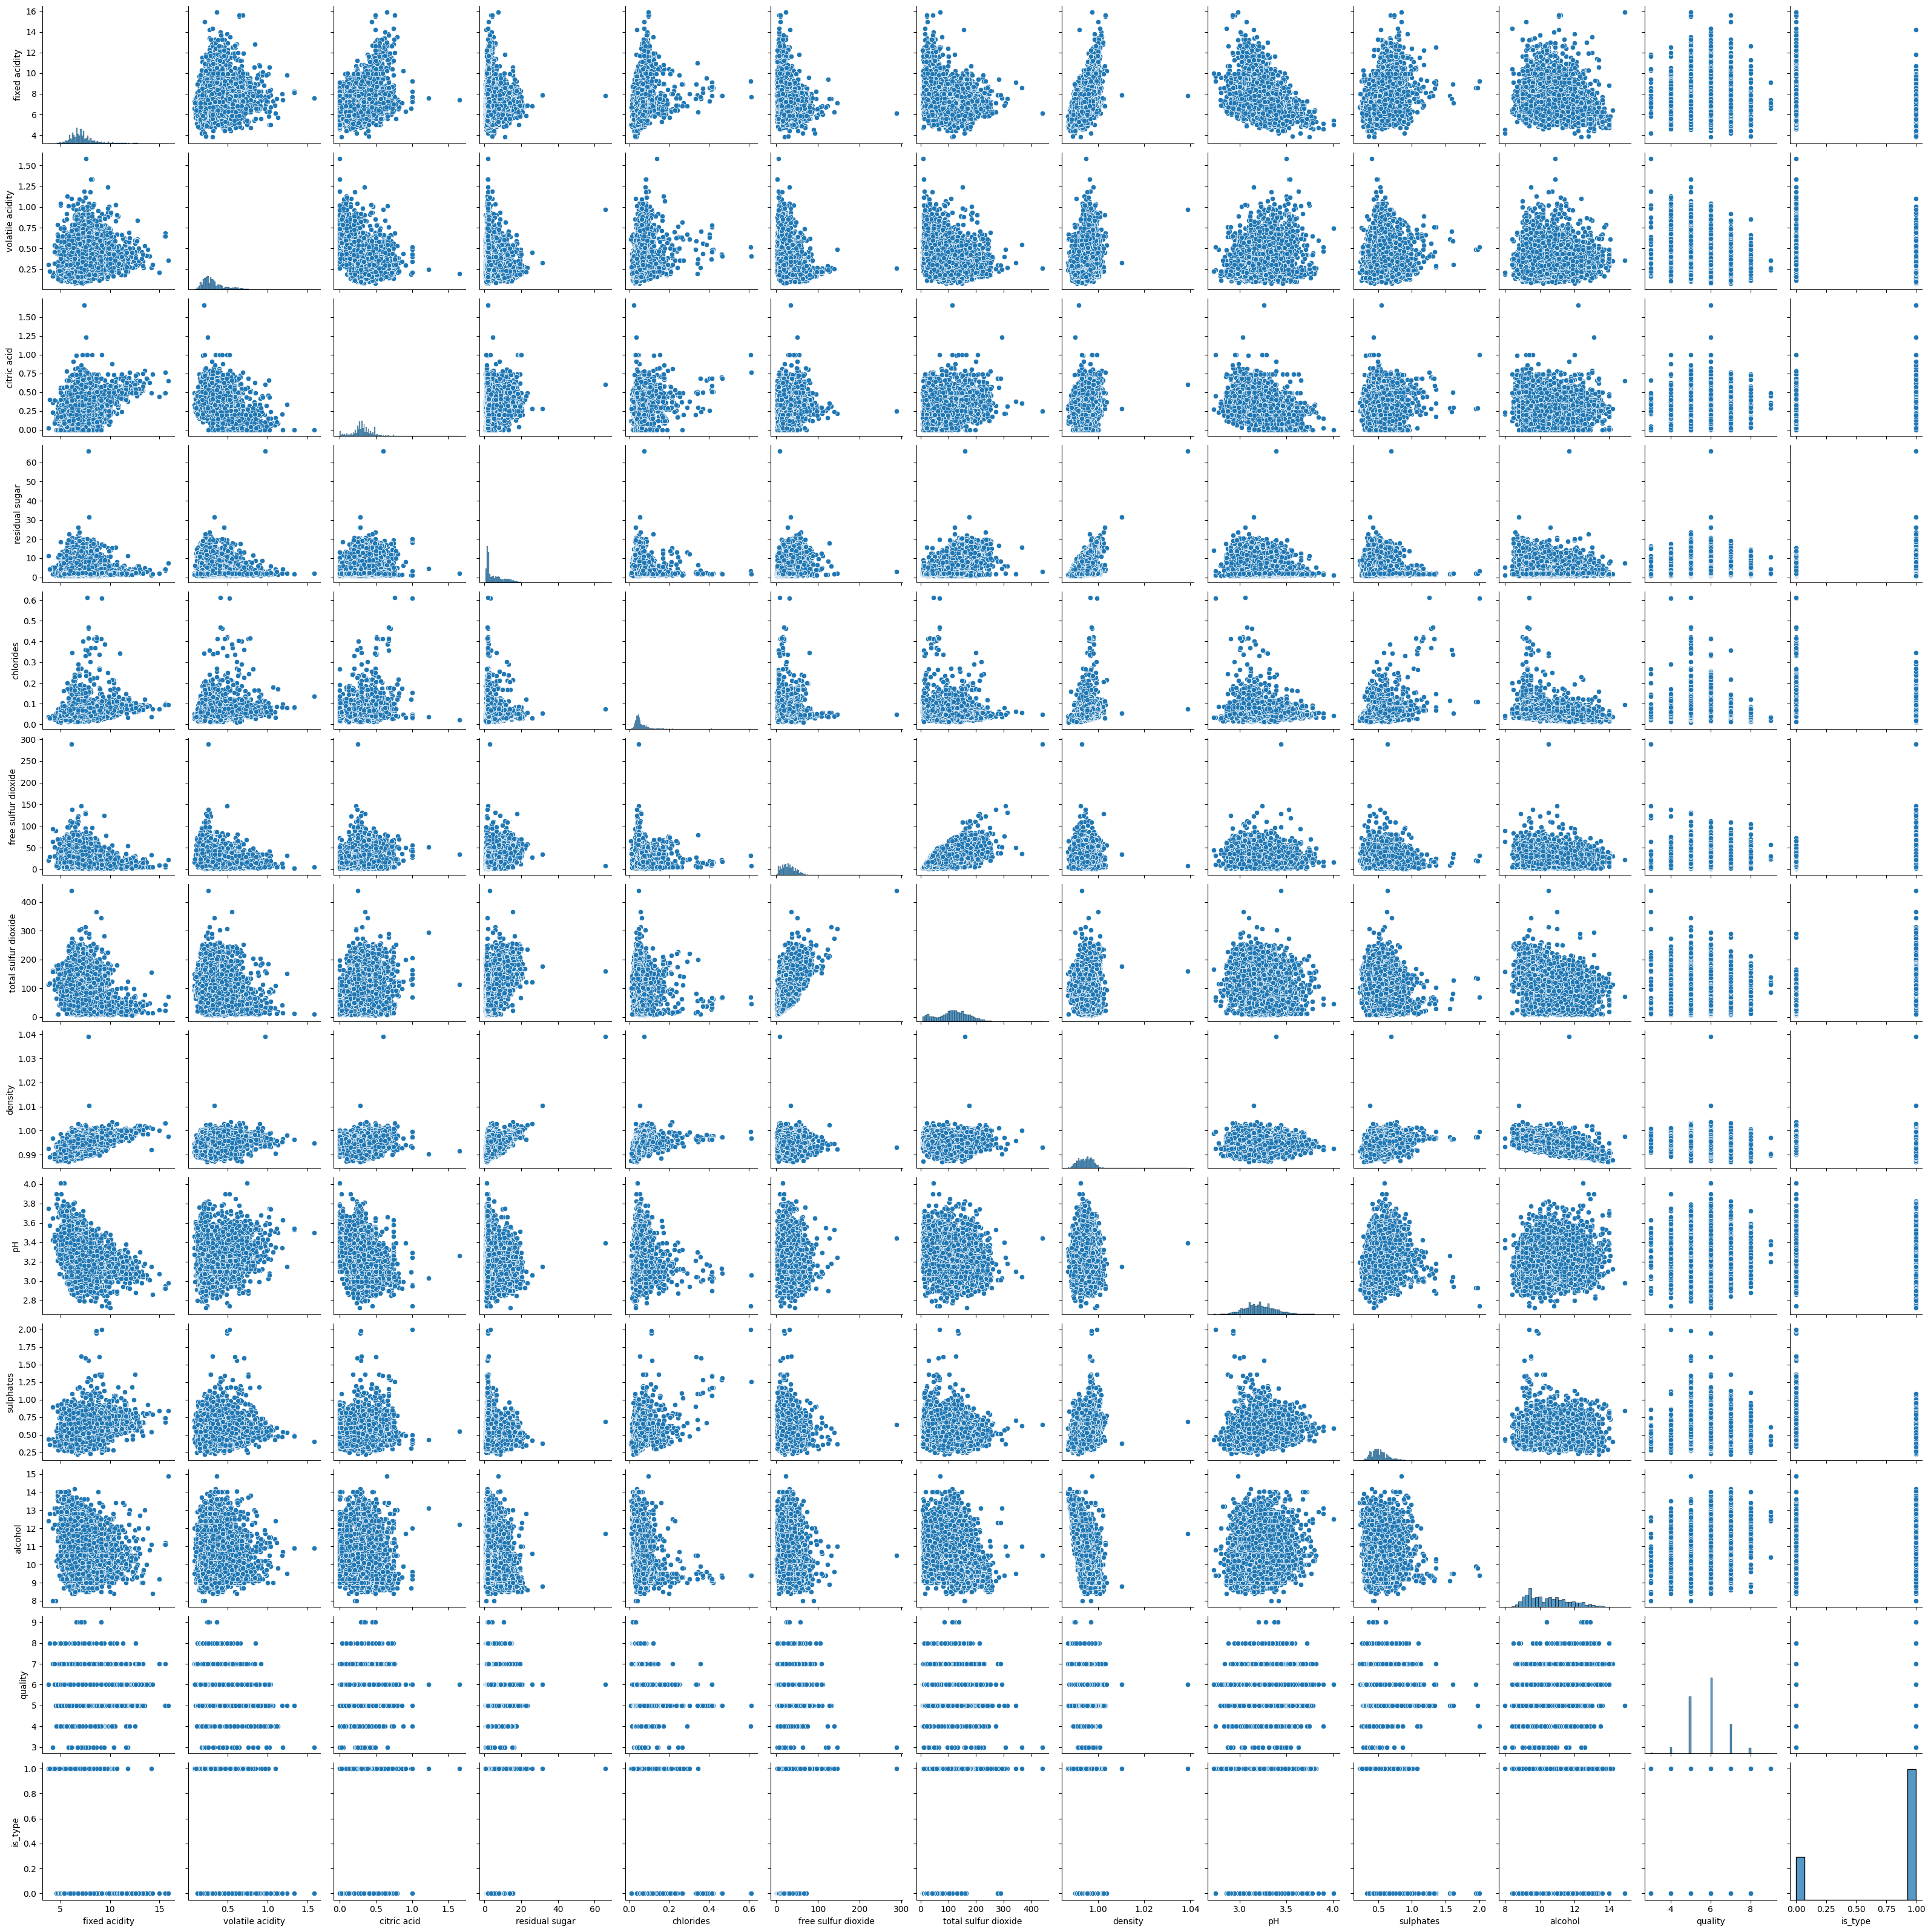

In [ ]:
# pair plot to check the colinearity
sns.pairplot(df)

# **Removing 1%, 5%, and 10% of data randomly and imputing the values back**

As the dataset used had some missing values in pH, total sulfur dioxide, free sulfur dioxide, tried randomly removing the data from pH features and imputing them back and checked the difference occurred using three different methods.

They are as follows:

*   KNN Imputer Method
*   Mean Imputation
*   Mice Algorithm for data imputation

In [ ]:
df_pH = df[['pH']]
df_pH['pH_copy_1_percent'] = df[['pH']]
df_pH['pH_copy_5_percent'] = df[['pH']]
df_pH['pH_copy_10_percent'] = df[['pH']]
df_pH

<ipython-input-126-3d46a3f5b8d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_1_percent'] = df[['pH']]
<ipython-input-126-3d46a3f5b8d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_5_percent'] = df[['pH']]
<ipython-input-126-3d46a3f5b8d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

pH  pH_copy_1_percent  pH_copy_5_percent  pH_copy_10_percent
0     3.00               3.00               3.00                3.00
1     3.30               3.30               3.30                3.30
2     3.26               3.26               3.26                3.26
3     3.19               3.19               3.19                3.19
4     3.19               3.19               3.19                3.19
...    ...                ...                ...                 ...
6492  3.45               3.45               3.45                3.45
6493  3.52               3.52               3.52                3.52
6494  3.42               3.42               3.42                3.42
6495  3.57               3.57               3.57                3.57
6496  3.39               3.39               3.39                3.39

[6142 rows x 4 columns]

# Checking the % missing value




In [ ]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [ ]:
get_percent_missing(df_pH)

column_name  percent_missing
pH                                  pH              0.0
pH_copy_1_percent    pH_copy_1_percent              0.0
pH_copy_5_percent    pH_copy_5_percent              0.0
pH_copy_10_percent  pH_copy_10_percent              0.0

In [ ]:
#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
# Create missing data in each col
create_missing(df_pH, 0.01, 'pH_copy_1_percent')
create_missing(df_pH, 0.05, 'pH_copy_5_percent')
create_missing(df_pH, 0.1, 'pH_copy_10_percent')

<ipython-input-129-fa51350b8831>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [ ]:
get_percent_missing(df_pH)

column_name  percent_missing
pH                                  pH         0.000000
pH_copy_1_percent    pH_copy_1_percent         0.993162
pH_copy_5_percent    pH_copy_5_percent         4.998372
pH_copy_10_percent  pH_copy_10_percent         9.996744

In [ ]:
# Store the indices of missing rows
pH_1_idx = list(np.where(df_pH['pH_copy_1_percent'].isna())[0])
pH_5_idx = list(np.where(df_pH['pH_copy_5_percent'].isna())[0])
pH_10_idx = list(np.where(df_pH['pH_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of pH_1_idx is {len(pH_1_idx)} and it contains {(len(pH_1_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")
print(f"Length of pH_5_idx is {len(pH_5_idx)} and it contains {(len(pH_5_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")
print(f"Length of pH_10_idx is {len(pH_10_idx)} and it contains {(len(pH_10_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")


Length of pH_1_idx is 61 and it contains 0.9931618365353304% of total data in column | Total rows: 6142
Length of pH_5_idx is 307 and it contains 4.9983718658417455% of total data in column | Total rows: 6142
Length of pH_10_idx is 614 and it contains 9.996743731683491% of total data in column | Total rows: 6142


In [ ]:
df_pH.isnull().sum()

pH                      0
pH_copy_1_percent      61
pH_copy_5_percent     307
pH_copy_10_percent    614
dtype: int64

Method 1: KNN imputer

In [ ]:
#perfomring scaling before KNN imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_pH = pd.DataFrame(scaler.fit_transform(df_pH))
df_pH.head()

#knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_pH = pd.DataFrame(imputer.fit_transform(df_pH))

#checking for missing values
df_pH.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [ ]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_pH[0].mean() - df_pH[1].mean())
print('Variance in 5% imputation column is - ', df_pH[0].mean() - df_pH[2].mean())
print('Variance in 10% imputation column is - ', df_pH[0].mean() - df_pH[3].mean())

Variance in 1% imputation column is -  0.0
Variance in 5% imputation column is -  -4.2070650080328065e-07
Variance in 10% imputation column is -  4.2070650080328065e-07


Method 2: Mean Imputation

In [ ]:
df_pH = df[['pH']]
df_pH['pH_copy_1_percent'] = df[['pH']]
df_pH['pH_copy_5_percent'] = df[['pH']]
df_pH['pH_copy_10_percent'] = df[['pH']]
df_pH

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

get_percent_missing(df_pH)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(df_pH, 0.01, 'pH_copy_1_percent')
create_missing(df_pH, 0.05, 'pH_copy_5_percent')
create_missing(df_pH, 0.1, 'pH_copy_10_percent')

get_percent_missing(df_pH)

# Store the indices of missing rows
pH_1_idx = list(np.where(df_pH['pH_copy_1_percent'].isna())[0])
pH_5_idx = list(np.where(df_pH['pH_copy_5_percent'].isna())[0])
pH_10_idx = list(np.where(df_pH['pH_copy_10_percent'].isna())[0])

print(f"Length of pH_1_idx is {len(pH_1_idx)} and it contains {(len(pH_1_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")
print(f"Length of pH_5_idx is {len(pH_5_idx)} and it contains {(len(pH_5_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")
print(f"Length of pH_10_idx is {len(pH_10_idx)} and it contains {(len(pH_10_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")

df_pH.isnull().sum()

Length of pH_1_idx is 61 and it contains 0.9931618365353304% of total data in column | Total rows: 6142
Length of pH_5_idx is 307 and it contains 4.9983718658417455% of total data in column | Total rows: 6142
Length of pH_10_idx is 614 and it contains 9.996743731683491% of total data in column | Total rows: 6142


<ipython-input-137-a7cc01650c81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_1_percent'] = df[['pH']]
<ipython-input-137-a7cc01650c81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_5_percent'] = df[['pH']]
<ipython-input-137-a7cc01650c81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

pH                      0
pH_copy_1_percent      61
pH_copy_5_percent     307
pH_copy_10_percent    614
dtype: int64

In [ ]:
#Applying mean to all the columns where data is missing
df_pH['pH_copy_1_percent'] = df_pH['pH_copy_1_percent'].fillna(df_pH['pH_copy_1_percent'].mean())
df_pH['pH_copy_5_percent'] = df_pH['pH_copy_5_percent'].fillna(df_pH['pH_copy_5_percent'].mean())
df_pH['pH_copy_10_percent'] = df_pH['pH_copy_10_percent'].fillna(df_pH['pH_copy_10_percent'].mean())
df_pH.isnull().sum()


<ipython-input-138-5f7331d734fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_1_percent'] = df_pH['pH_copy_1_percent'].fillna(df_pH['pH_copy_1_percent'].mean())
<ipython-input-138-5f7331d734fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_5_percent'] = df_pH['pH_copy_5_percent'].fillna(df_pH['pH_copy_5_percent'].mean())
<ipython-input-138-5f7331d734fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

pH                    0
pH_copy_1_percent     0
pH_copy_5_percent     0
pH_copy_10_percent    0
dtype: int64

In [ ]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_pH['pH'].mean() - df_pH['pH_copy_1_percent'].mean())
print('Variance in 5% imputation column is - ', df_pH['pH'].mean() - df_pH['pH_copy_5_percent'].mean())
print('Variance in 10% imputation column is - ', df_pH['pH'].mean() - df_pH['pH_copy_10_percent'].mean())

Variance in 1% imputation column is -  -0.0002766994591709704
Variance in 5% imputation column is -  -0.0010565161876292528
Variance in 10% imputation column is -  0.0001031939381990199


Method 3: Mice Algorithm

In [ ]:
df_pH = df[['pH']]
df_pH['pH_copy_1_percent'] = df[['pH']]
df_pH['pH_copy_5_percent'] = df[['pH']]
df_pH['pH_copy_10_percent'] = df[['pH']]
df_pH

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

get_percent_missing(df_pH)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(df_pH, 0.01, 'pH_copy_1_percent')
create_missing(df_pH, 0.05, 'pH_copy_5_percent')
create_missing(df_pH, 0.1, 'pH_copy_10_percent')

get_percent_missing(df_pH)

# Store the indices of missing rows
pH_1_idx = list(np.where(df_pH['pH_copy_1_percent'].isna())[0])
pH_5_idx = list(np.where(df_pH['pH_copy_5_percent'].isna())[0])
pH_10_idx = list(np.where(df_pH['pH_copy_10_percent'].isna())[0])

print(f"Length of pH_1_idx is {len(pH_1_idx)} and it contains {(len(pH_1_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")
print(f"Length of pH_5_idx is {len(pH_5_idx)} and it contains {(len(pH_5_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")
print(f"Length of pH_10_idx is {len(pH_10_idx)} and it contains {(len(pH_10_idx)/len(df_pH['pH_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_pH['pH_copy_1_percent'])}")

df_pH.isnull().sum()

Length of pH_1_idx is 61 and it contains 0.9931618365353304% of total data in column | Total rows: 6142
Length of pH_5_idx is 307 and it contains 4.9983718658417455% of total data in column | Total rows: 6142
Length of pH_10_idx is 614 and it contains 9.996743731683491% of total data in column | Total rows: 6142


<ipython-input-140-a7cc01650c81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_1_percent'] = df[['pH']]
<ipython-input-140-a7cc01650c81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pH['pH_copy_5_percent'] = df[['pH']]
<ipython-input-140-a7cc01650c81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

pH                      0
pH_copy_1_percent      61
pH_copy_5_percent     307
pH_copy_10_percent    614
dtype: int64

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data=imp.fit_transform(data)

#checking for missing values
df_pH.isnull().sum()
print('\n Values are inserted with MICE Imputer successfully!')

[IterativeImputer] Completing matrix with shape (6497, 12)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.12
[IterativeImputer] Change: 0.0, scaled tolerance: 0.44 
[IterativeImputer] Early stopping criterion reached.

 Values are inserted with MICE Imputer successfully!


In [ ]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_pH['pH'].mean() - df_pH['pH_copy_1_percent'].mean())
print('Variance in 5% imputation column is - ', df_pH['pH'].mean() - df_pH['pH_copy_5_percent'].mean())
print('Variance in 10% imputation column is - ', df_pH['pH'].mean() - df_pH['pH_copy_10_percent'].mean())


Variance in 1% imputation column is -  -0.0006072371996741488
Variance in 5% imputation column is -  -0.00046697034358444967
Variance in 10% imputation column is -  -0.00030201590261036415


In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  is_type  
0       0.45      8.8        6        1  
1       0.49      9.5        6        1  
2       0.44     10.1        6        1  
3       0.40      9.9        6        1  
4       0.40      9.9        6        1

# Building and Training Model KNN

In [ ]:
#Defining values for X and y
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
y = df['is_type']

In [ ]:
from sklearn.model_selection import train_test_split

#Spliting data into Training 60% and Test set 40%

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Fitting the data into KNN algorithm
kNN = KNeighborsClassifier(n_neighbors = 2)
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
kNN1 = KNeighborsClassifier(n_neighbors = 3)
kNN1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
kNN2 = KNeighborsClassifier(n_neighbors = 4)
kNN2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Predicting the results for y= wine
y_pred = kNN.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
y_pred1 = kNN1.predict(X_test)
y_pred2 = kNN2.predict(X_test)

# **Metrics Score**

Confusion Matrix

In [ ]:
from sklearn import metrics

#calculating the accuracy score using KNN model

print("kNN model accuracy when n = 2 :", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_test,y_pred))
print("kNN model accuracy when n = 3 :", metrics.accuracy_score(y_test, y_pred1))
print('Confusion Matrix:', metrics.confusion_matrix(y_test,y_pred1))
print("kNN model accuracy when n = 4 :", metrics.accuracy_score(y_test, y_pred2))
print('Confusion Matrix:', metrics.confusion_matrix(y_test,y_pred))

kNN model accuracy when n = 2 : 0.9141977683724509
Confusion Matrix: [[ 577   55]
 [ 168 1799]]
kNN model accuracy when n = 3 : 0.9361292804924971
Confusion Matrix: [[ 542   90]
 [  76 1891]]
kNN model accuracy when n = 4 : 0.929588303193536
Confusion Matrix: [[ 577   55]
 [ 168 1799]]


In [ ]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

# Identifying the predictor significance

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['is_type'], df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                is_type   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          1.060e+04
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                        0.00
Time:                        22:01:36   Log-Likelihood:                          1529.6
No. Observations:                6497   AIC:                                     -3035.
Df Residuals:                    6485   BIC:                                     -2954.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0918      0.002    -36.943      0.000      -0.097      -0.087
volatile acidity        -0.7818      0.019    -40.302      0.000      -0.820      -0.744
citric acid              0.1194      0.021      5.759      0.000       0.079       0.160
residual sugar           0.0003      0.001      0.550      0.582      -0.001       0.002
chlorides               -1.5264      0.085    -17.988      0.000      -1.693      -1.360
free sulfur dioxide     -0.0028      0.000    -14.030      0.000      -0.003      -0.002
total sulfur dioxide     0.0036   7.11e-05     50.011      0.000       0.003       0.004
density                  2.8826      0.073     39.330      0.000       2.739       3.026
pH                      -0.5029      0.018    -28.123      0.000      -0.538      -0.468
sulphates               -0.4333      0.019    -23.269      0.000      -0.470      -0.397
alcohol                  0.0412      0.003     16.088      0.000       0.036       0.046
quality                 -0.0088      0.003     -2.734      0.006      -0.015      -0.002
==============================================================================
Omnibus:                      683.939   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2299.037
Skew:                          -0.523   Prob(JB):                         0.00
Kurtosis:                       5.720   Cond. No.                     4.99e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Notes

1. Standard Errors assume that the covariance matrix of the errors is correctly specified.

2. Considering the significance value of 0.05 because accuracy in predicting diabetes with diagnostic measures is not that critical

3. The fixed acidity has the p-value 0, which is lesser and hence it is a  significant feature.

4. The volatile acidity has the p-value 0, which is lesser and hence it is a significant feature.

5. The citric acid has the p-value 0, which is lesser and hence it is a non significant feature.

6. The residual sugar has the p-value 0.582, which is greater and hence it is a non significant feature.

7. The chlorides has the p-value 0, which is lesser and hence it is a significant feature.

8. The free sulfer dioxide has the p-value 0, which is lesser and hence it is a significant feature.

9. The total sulfur has the p-value 0, which is lesser and hence it is a significant feature.

10. The density has the p-value 0, which is lesser and hence it is a significant feature.

11. The pH has the p-value 0 , which is lesser and hence it is a significant feature.

12. The sulphates has the p-value 0, which is lesser and hence it is a significant feature.

13. The alcohol has the p-value 0, which is lesser and hence it is a  significant feature.

14. The quality has the p-value 0, which is lesser and hence it is a significant feature.



# Understanding the important features

In [ ]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(kNN2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


The permutation importance also aligns with the p-value of OLS Regression result and total sulfur dioxide turns out to be the most significant value in predicting the type of the wine

# Building a Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
y = df['is_type']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
X_test_plot = X_test[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]

X_val_plot = X_val[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]

X_train_plot = X_train[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]

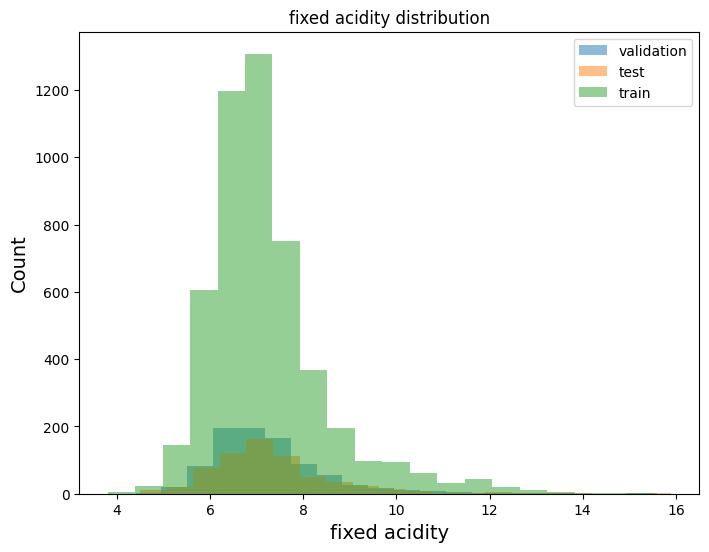

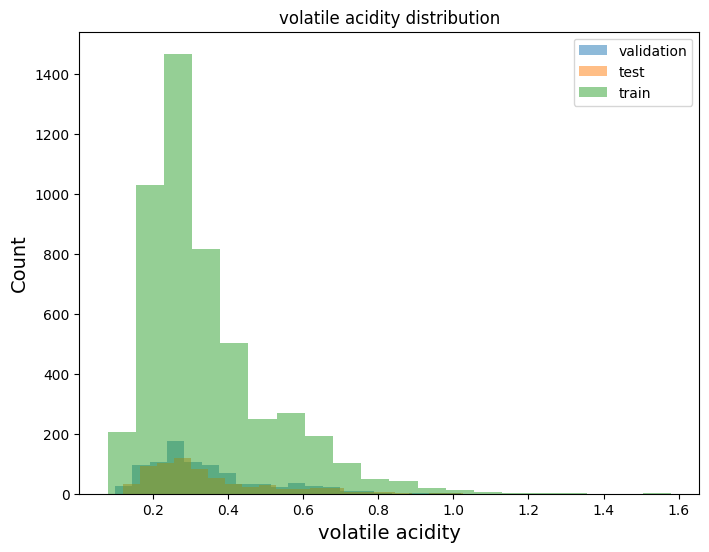

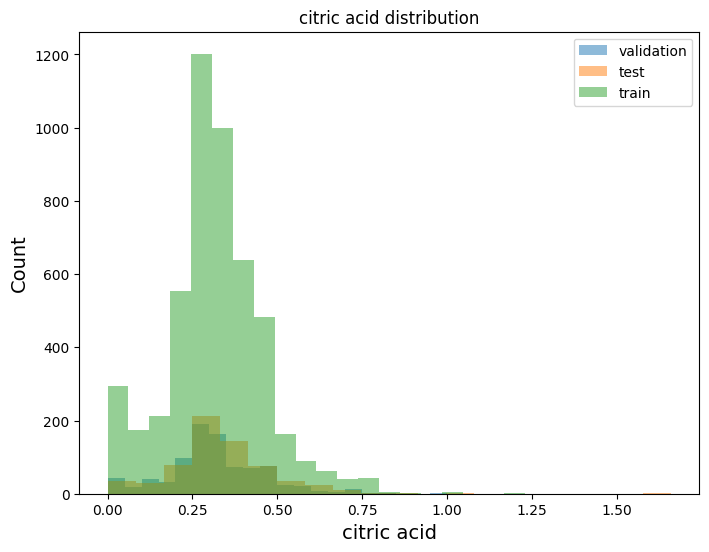

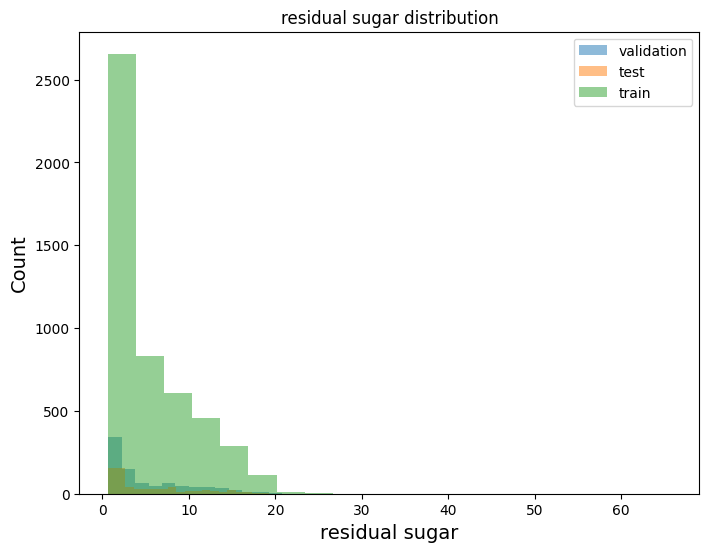

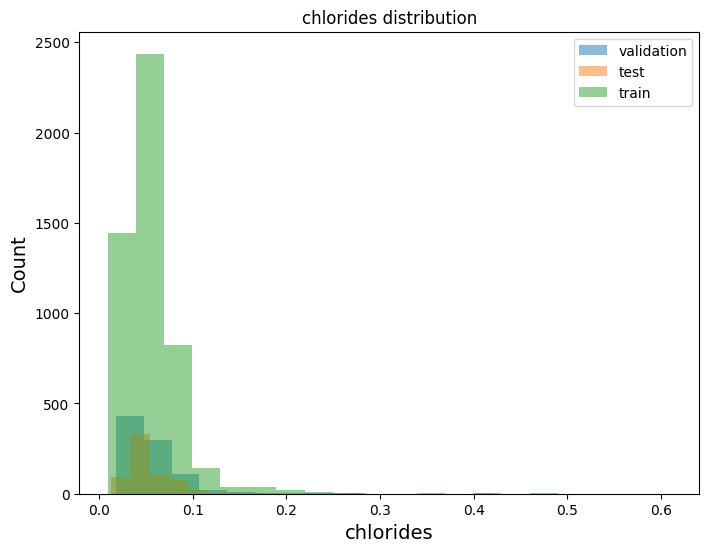

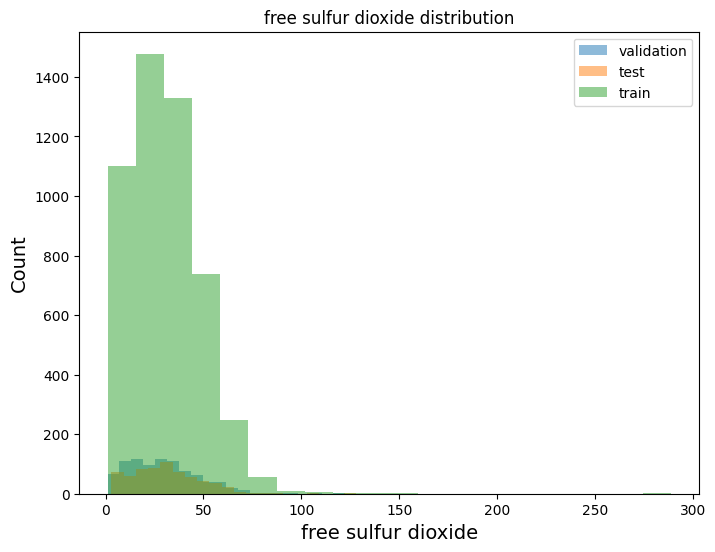

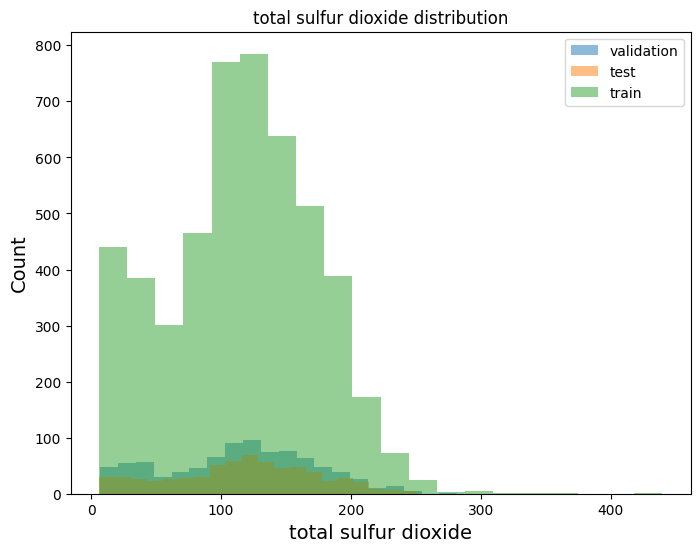

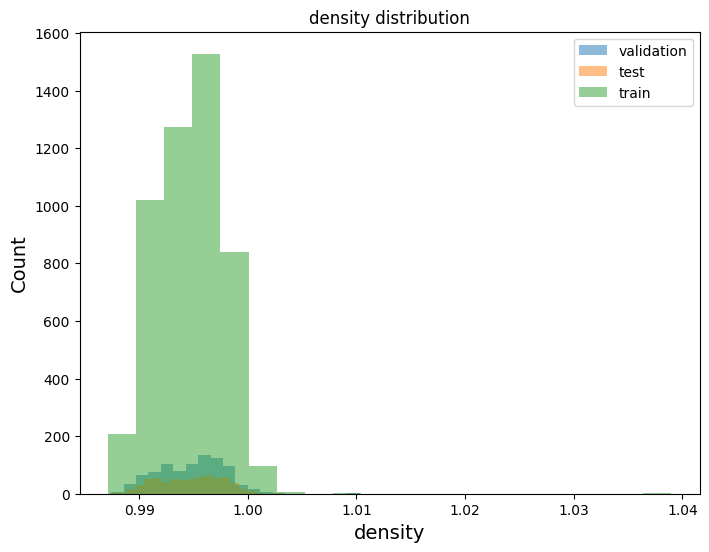

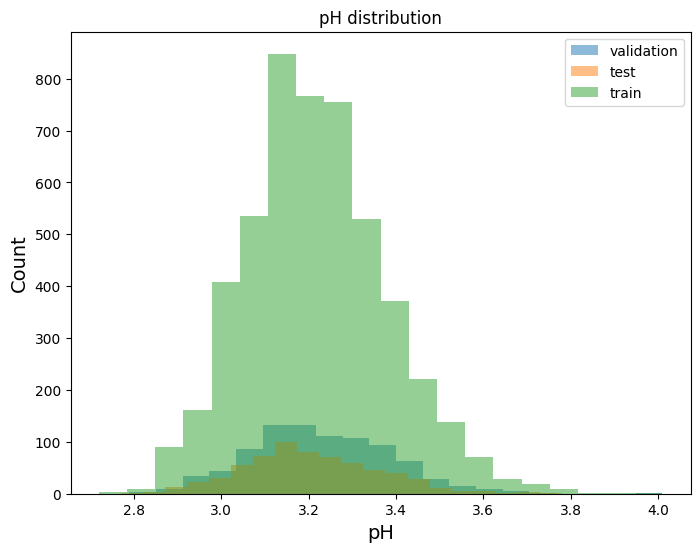

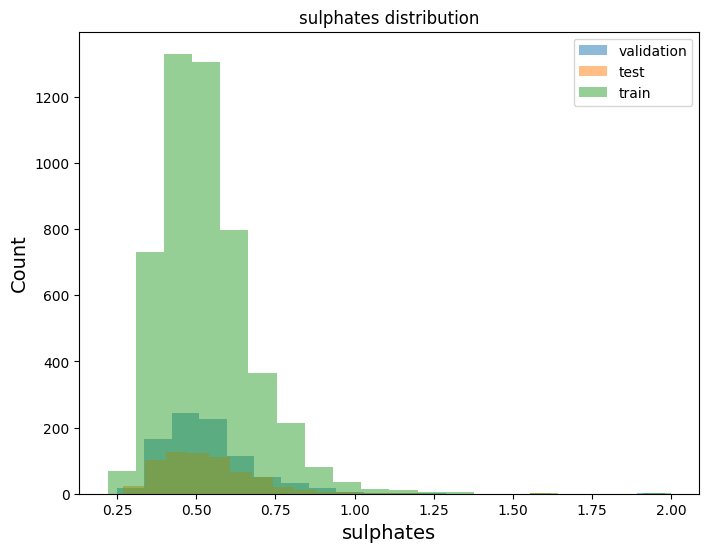

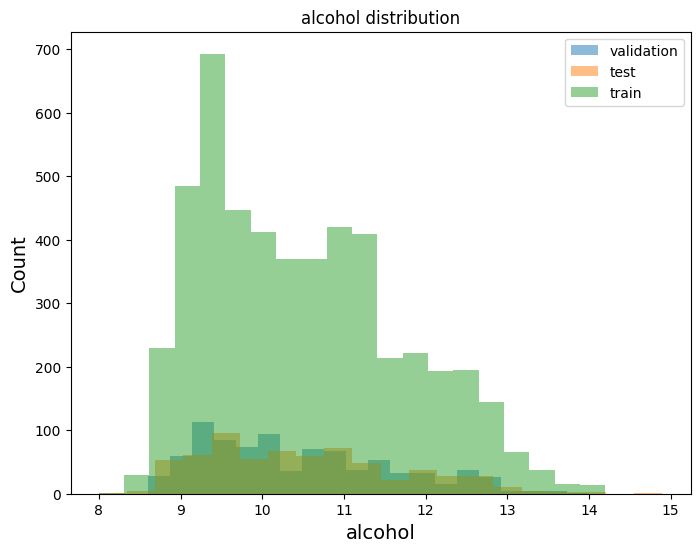

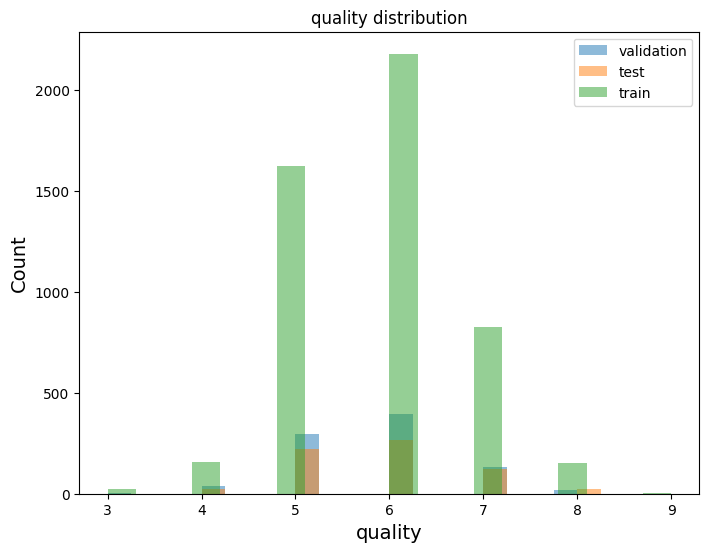

In [ ]:
# Plotting the data to see the histogram distribution
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

# Logistic Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions using the training set
y_pred = reg.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
acc = accuracy_score(y_train,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_train,y_pred))

Mean squared error: 0.02
Coefficient of determination: 0.88
R^2 score on training set = 0.8847768115942028
Accuracy score = 0.9786677399879251
Confusion Matrix: [[1159   60]
 [  46 3704]]


In [ ]:
# Make predictions using the validation set
y_pred = reg.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
acc = accuracy_score(y_val,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_val,y_pred))

Mean squared error: 0.02
Coefficient of determination: 0.88
R^2 score on validation set = 0.8815114709851551
Accuracy score = 0.9772209567198178
Confusion Matrix: [[217  11]
 [  9 641]]


In [ ]:
# Make predictions using the test set
y_pred = reg.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2_test = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_test,y_pred))


Mean squared error: 0.03
Coefficient of determination: 0.85
R^2 score on test set = 0.8540213485521031
Accuracy score = 0.9738461538461538
Confusion Matrix: [[142  10]
 [  7 491]]


# Understanding Important Feature

In [ ]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

The permutation importance is also aligned with the P values where total sulfur dioxide is a significant value and along with rest others like, volatile acidity, sulphates, free sulfur dioxide, fixed acidity

# Removing The outliers

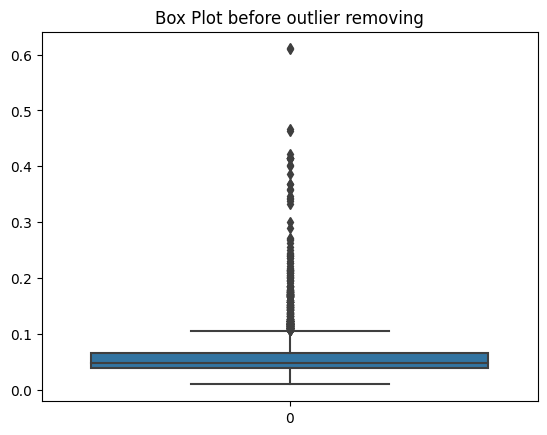

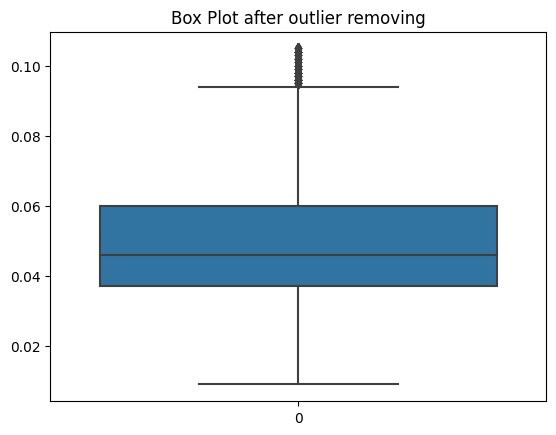

In [ ]:
#removing outliers for chlorides
sns.boxplot(df['chlorides'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'chlorides')
sns.boxplot(df['chlorides'])
plt.title("Box Plot after outlier removing")
plt.show()

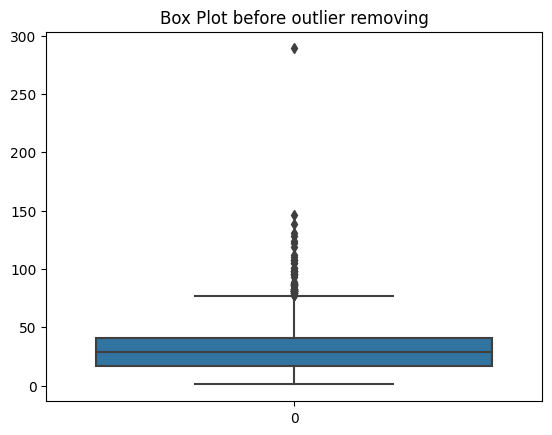

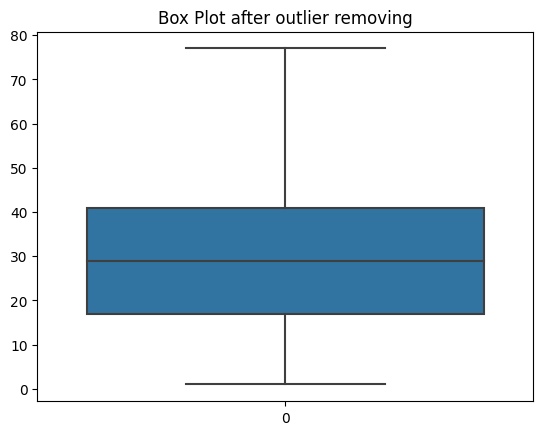

In [ ]:
#removing outliers for free sulfur dioxide
sns.boxplot(df['free sulfur dioxide'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'free sulfur dioxide')
sns.boxplot(df['free sulfur dioxide'])
plt.title("Box Plot after outlier removing")
plt.show()

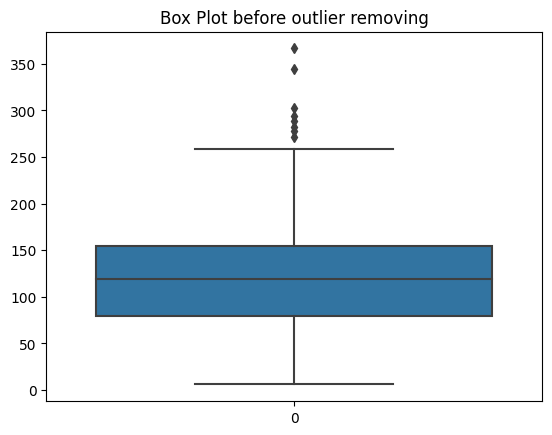

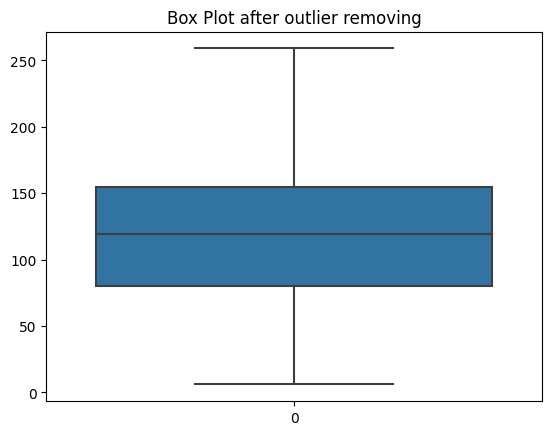

In [ ]:
#removing outliers for total sulfur dioxide
sns.boxplot(df['total sulfur dioxide'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'total sulfur dioxide')
sns.boxplot(df['total sulfur dioxide'])
plt.title("Box Plot after outlier removing")
plt.show()

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   

   sulphates  alcohol  quality  is_type  
1       0.49      9.5        6        1  
2       0.44     10.1        6        1  
3       0.40      9.9        6        1  
4       0.40      9.9        6        1  
5       0.44     10.1        6        1

In [ ]:
df.shape

(6036, 14)

# **Executing** Logistic Regression after removing Outliers

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
from sklearn.model_selection import train_test_split

X1 = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
y1 = df['is_type']

# Spliting data into Training 60% and Test set 40%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=1)

In [ ]:
reg1 = LogisticRegression()
reg1.fit(X1_train,y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions using the test set
y1_pred = reg1.predict(X1_test)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y1_test, y1_pred))
r2_test = r2_score(y1_test,y1_pred)
print('R^2 score on test set =',r2_test)
acc = accuracy_score(y1_test,y1_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y1_test,y1_pred))

Mean squared error: 0.02
Coefficient of determination: 0.86
R^2 score on test set = 0.8559805587159066
Accuracy score = 0.9751729751729752
Confusion Matrix: [[ 501   43]
 [  18 1895]]


After removing Outliers it has been observed that accuracy score for logistic regression was increased by 0.002

# Answer the following questions:

* What are the likely distributions of the numeric variables?

Ans: Numeric variables for this dataset are 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'.

When qq-plot was plotted for these variables it was observed that every variable except chlorine roughly follow normal distribution curve.

* Which independent variables are useful to predict a target (dependent variable)?


Ans: Three methods use to determine which variables are important for prediction are correlation matrix, calculating p-value and plotting independent variable against target variable. From all these three methods the most important independent variables are glucose, hdl_chol, weight, systolic_bp, diastolic_bp


* Which independent variable have missing data? How much?

Answer: Below independant variables has missing data

1. Fixed acidity - 10

2. Volatile acidity - 8

3. Citric acid - 3

4. Residual sugar - 2

5. Chlorides - 2

6. pH - 9

7. Sulphates - 4



*   Do the training and test sets have the same data?




Ans: No, in KNN model the train and test data are split into 60:40 ratio respectively.
Also in logistic Regression model the train, validation and test data are split into 75:15:10 ration respectively.

* In the predictor variables independent of all the other predictor variables?





Ans: Yes, mostly all features are independent of eachother, this can be inferred from the correlation matrix and heatmap plot. Except total sulfur, free sulfur and is_type features closely resemble multi-colinearity as the correlation is equal to 0.7.

* Which predictor variables are the most important?

Ans: Below is the rank of predictors:

1.Total sulfur dioxide

2.Free sulfur dioxide
3.Residual sugar

4.Alcohol

5.Fixed acidity

6.Quality

7.Sulphates

8.Density

9.Chlorides

10.Citric acid

11.pH

12.Volatile acidity




* Do the ranges of the predictor variables make sense?

Ans: Yes, predictor variables make sense as when analyzed the qq-plot every other feature follows the normalisation except for a few values of chlroine feature.

It was observed there are outliers in residual sugar, free sulfur dioxide and total sulfer dioxide

Almost all variables are independent except total sulfer dioxide, total sulfer dioxide and is_type(Wine) whose correlation value is about 0.7 hence we can infer that they have multi-collinearity.

* What are the distributions of the predictor variables?

Ans: Looking at the Q-Q plots, it appears that all independent variables are
roughly following normal distribution except for chlorine

type is categorical value and have 2 different values namely white and red

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Ans: Keeping the outliers, Logistic regression was performed on the model and it was found the accuracy was 0.9738

After removing the outliers, Logistic regression was again performed on the model and it was found the accuracy rose by 0.002 and was 0.9751

Removing Outliers helped in calculating better accuracy for the model.

# Conclusion

From the analysis done with the above dataset we can conclude that most variables are independent of each other, total sulfer, free sulfer and is_type closely show multi-collinearity.

Total sulfur dioxide has the significant value from all the independent variables

# **References**
1. Scikit learn official documentation
2. Referred Towards Data Science
3. Eli5 official documentation


The algorithms were referred directly from the Scikit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documentation 4. Kaggle notebooks for prediction of diabetes using diagnotic measures 5. Notebook for reference : https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

# **License**

Copyright 2023 Sampada Kasture

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
